In [1]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import tensorflow as tf
from mpl_toolkits import mplot3d
from IPython import display
from matplotlib import pyplot as plt
from matplotlib.text import OffsetFrom
# from d2l import tensorflow as d2l
from matplotlib import rc


In [2]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('png')


# Defined in file: ./chapter_preliminaries/calculus.md
def set_figsize(figsize=(13.5, 12.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize


# Defined in file: ./chapter_preliminaries/calculus.md
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


# Defined in file: ./chapter_preliminaries/calculus.md
def plot(X, Y=None, xlabel=None, ylabel=None, label=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('k-', 'c--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

# def annotate(text, xy, xytext):
#     plt.gca().annotate(text, xy=xy, xytext=xytext,
#                            arrowprops=dict(arrowstyle='->', shrink=0.5),
#                             fontsize=30)

In [3]:
def f(x):
    return x * tf.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * tf.cos(5 * np.pi * x)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


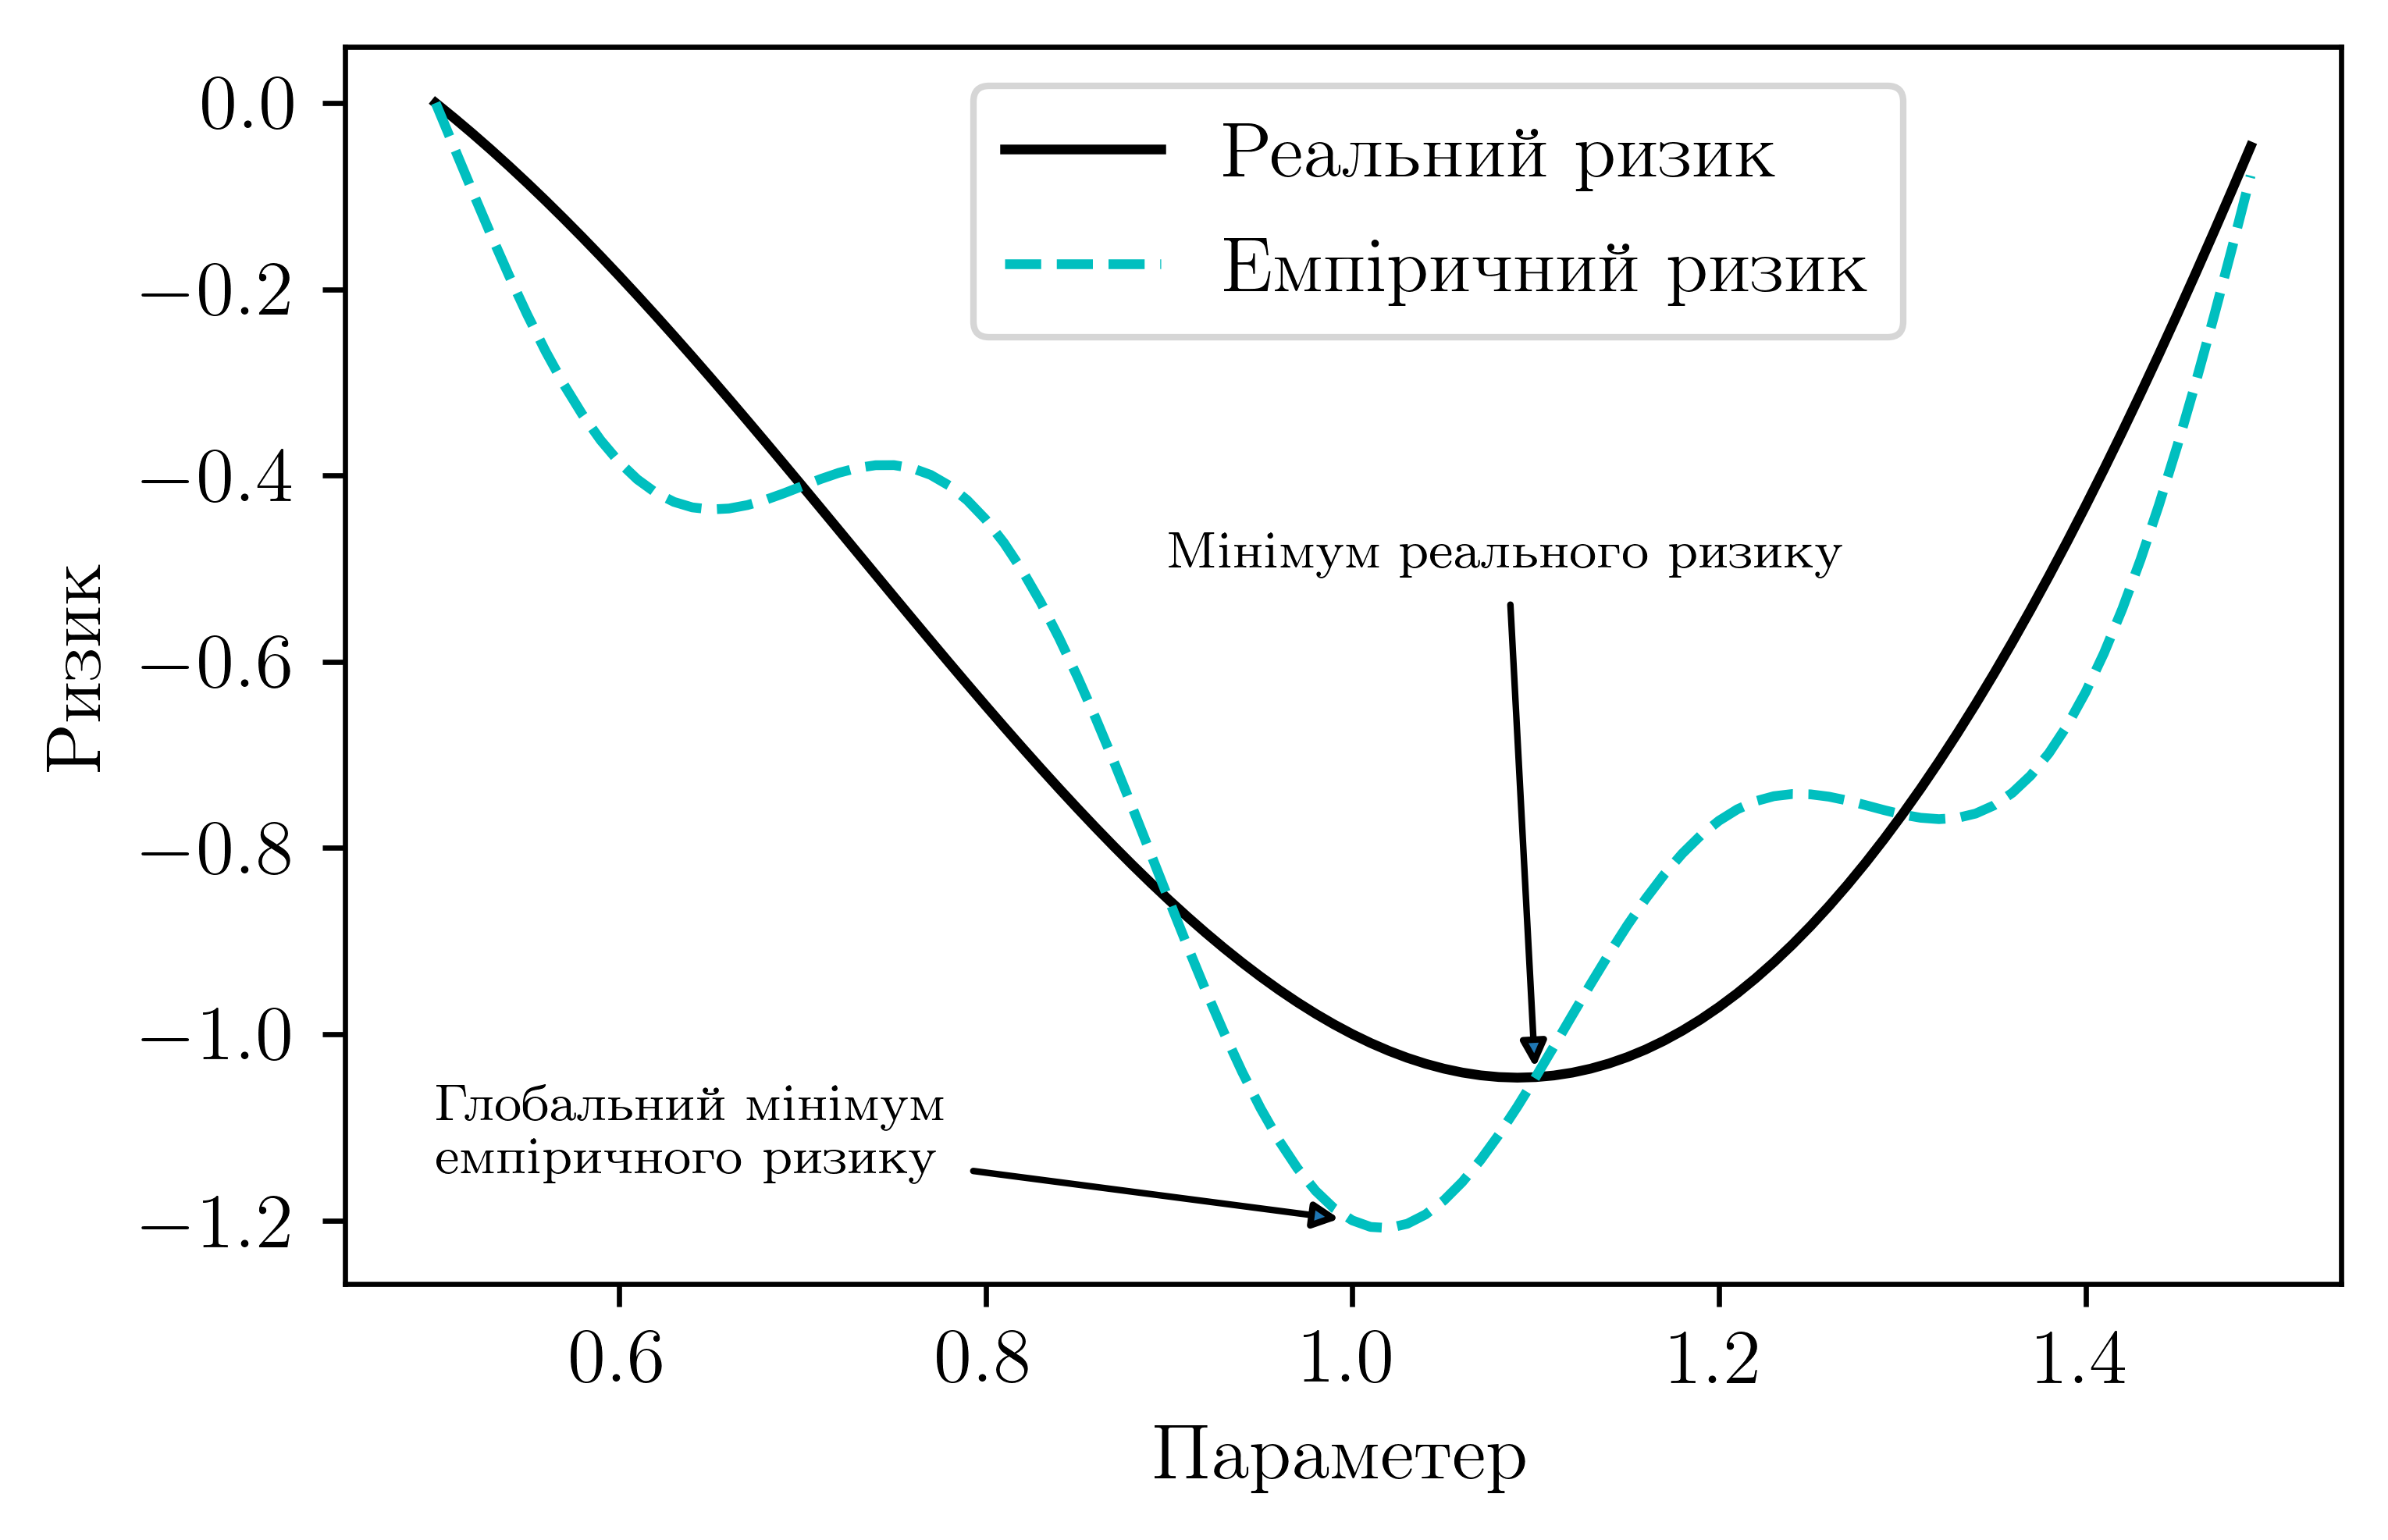

In [4]:
def annotate(text, xy, xytext):  
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='-|>'),
                            fontsize=8)
x = tf.range(0.5, 1.5, 0.01)
betas = [f(x), g(x)]
b = ["Реальний ризик", "Емпіричний ризик"]
fmts = ['k-', 'c--']

#x = tf.range(0.5, 1.5, 0.01)
set_figsize((5.5, 3.5))
#plt.rcParams["font.family"] = "Times New Roman"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
#rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[ukrainian]{babel}')
plt.rcParams['font.size'] = 12
plt.figure(dpi=600)

for (beta, i, m) in zip(betas, b, fmts):
    x = tf.range(0.5, 1.5, 0.01)
    plt.plot(x, beta, m, label=f"{str(i)}")
    #plt.plot(x, beta, m, label=f"beta is {str(i)}")
    
#plot(x, [f(x), g(x)], 'Параметер', 'Ризик', )
plt.xlabel(r"Параметер")
plt.ylabel(r"Ризик")
annotate("Глобальний мінімум\nемпіричного ризику", (1.0, -1.2), (0.5, -1.15))
annotate(r'Мінімум реального ризику', (1.1, -1.05), (0.9, -0.5))
plt.legend(loc=1, bbox_to_anchor=(0.8,1));
#min

In [5]:
# set_figsize((5.5, 3.5))
# #plt.rcParams["font.family"] = "Times New Roman"

# plt.rcParams['mathtext.fontset'] = 'stixsans'
# #plt.rcParams["font.family"] = "serif"
# #plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
# plt.rcParams['font.size'] = 12
# plt.figure(dpi=1024)

# x = tf.range(-1.0, 2.0, 0.01)
# plt.plot(x, f(x), 'k-')

# plt.xlabel('$\mathrm{x}$')
# plt.ylabel('$\mathrm{f(x)}$')
# annotate('Локальний мінімум', (-0.3, -0.25), (-0.77, -1.0))
# annotate('Глобальний мінімум', (1.1, -0.95), (0.6, 0.8))

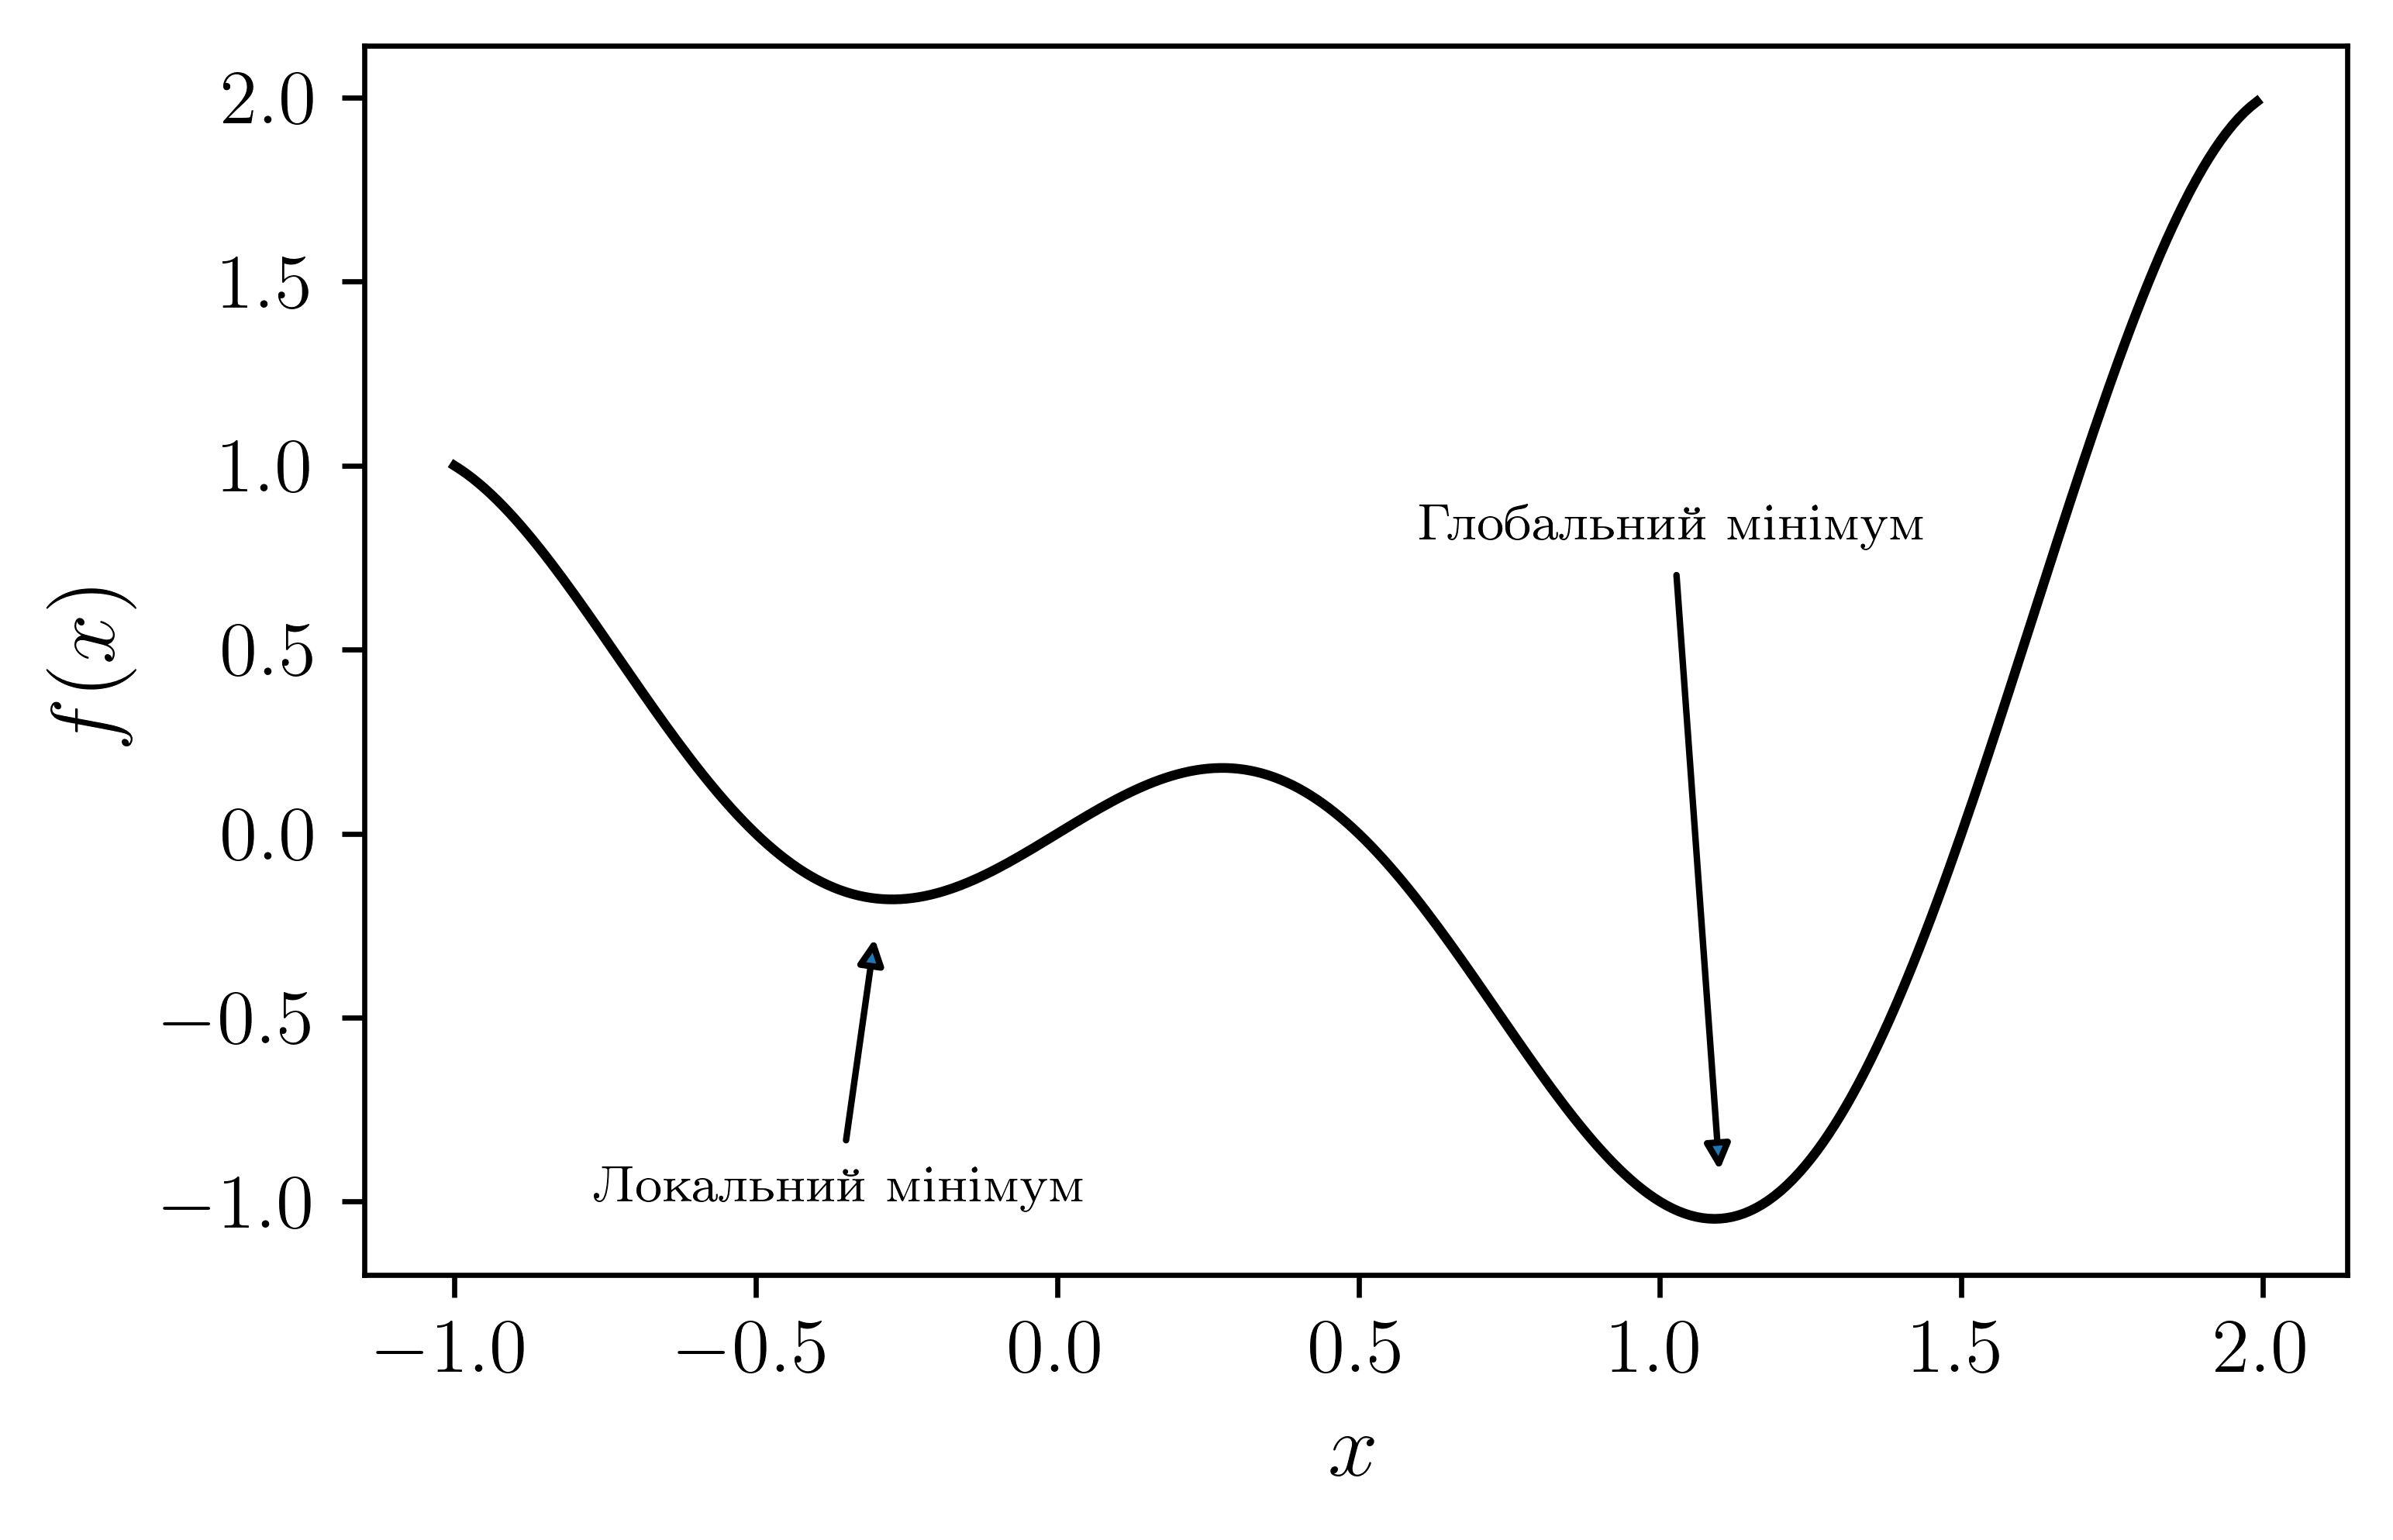

In [6]:

#mport matplotlib.pyplot as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
#rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[ukrainian]{babel}')

#plt.rcParams['font.size'] = 12
plt.figure(dpi=600)

x = tf.range(-1.0, 2.0, 0.01)
plt.plot(x, f(x), 'k-')

plt.xlabel(r"$x$", size=14)
plt.ylabel(r"$f(x)$", size=14)
annotate(r"Локальний мінімум", (-0.3, -0.25), (-0.77, -1.0))
annotate(r'Глобальний мінімум', (1.1, -0.95), (0.6, 0.8))
# plt.show()

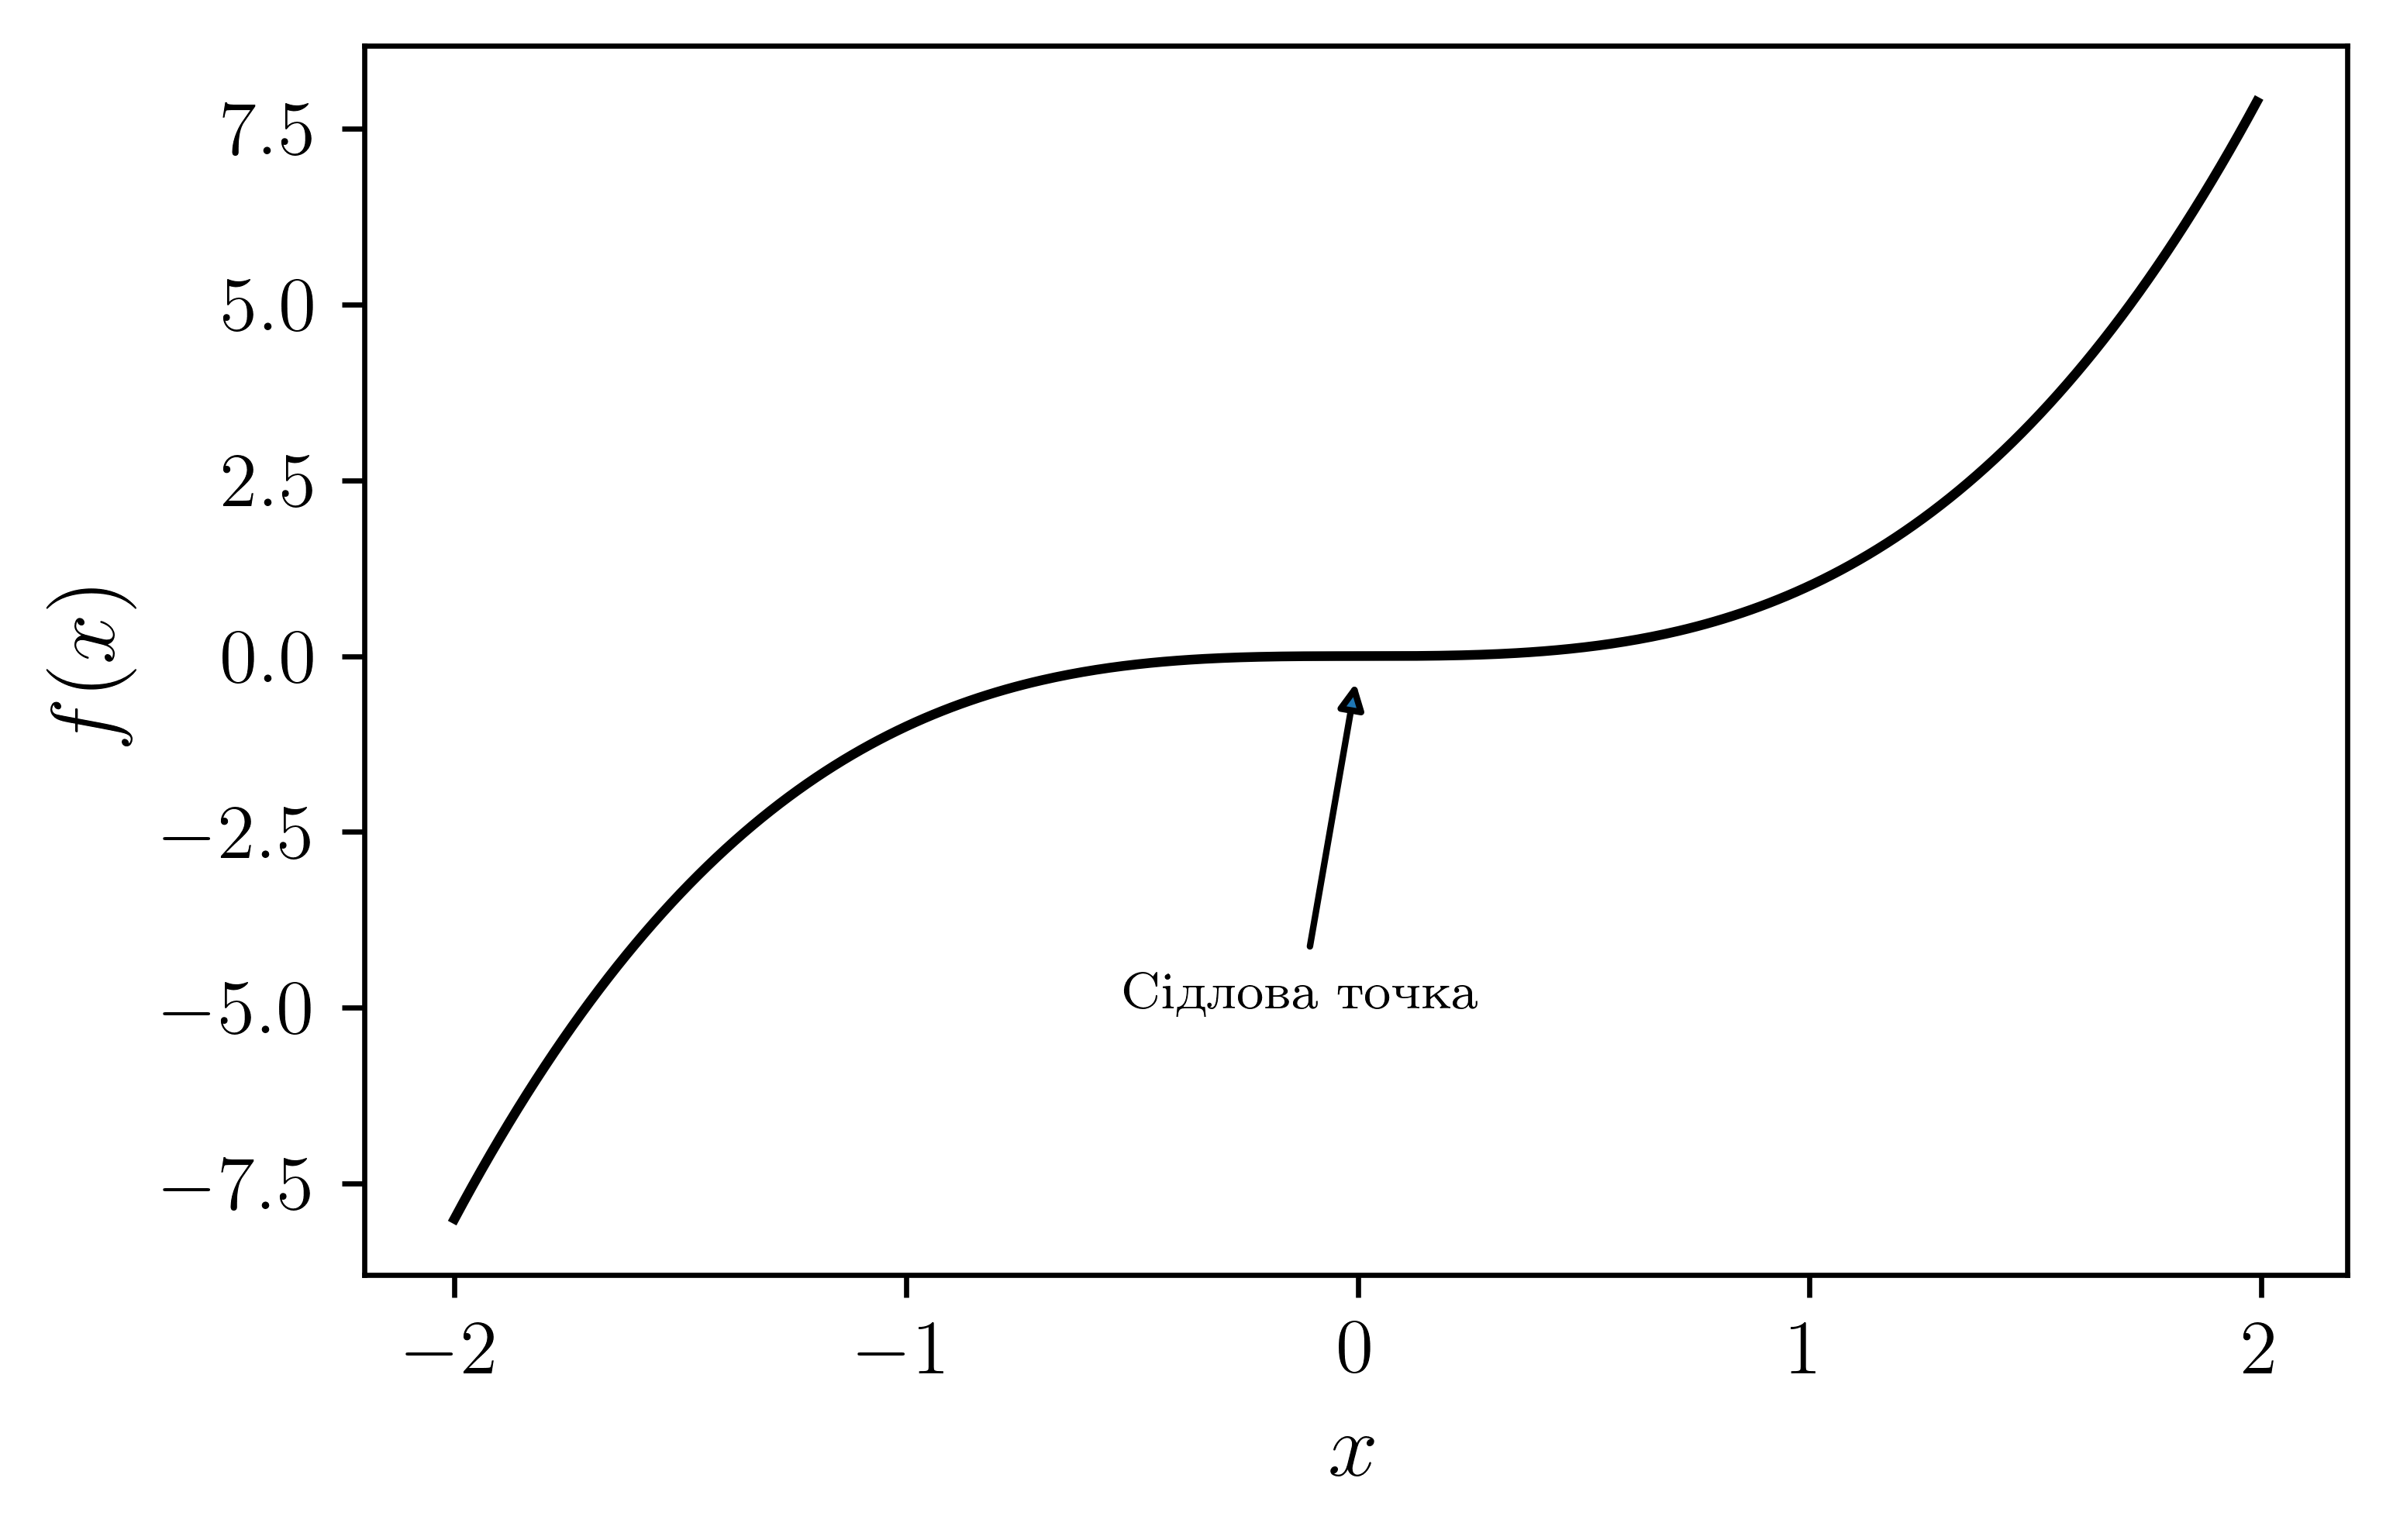

In [7]:
# def annotate(text, xy, xytext):  
#     plt.gca().annotate(text, xy=xy, xytext=xytext,
#                            arrowprops=dict(arrowstyle='-|>'),
#                             fontsize=5)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
#rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[ukrainian]{babel}')


plt.figure(dpi=600)

x = tf.range(-2.0, 2.0, 0.01)
plt.plot(x, x**3, '-k')

plt.xlabel(r"$x$", size=14)
plt.ylabel(r"$f(x)$", size=14)
annotate(r'Сідлова точка', (0, -0.2), (-0.52, -5.0))

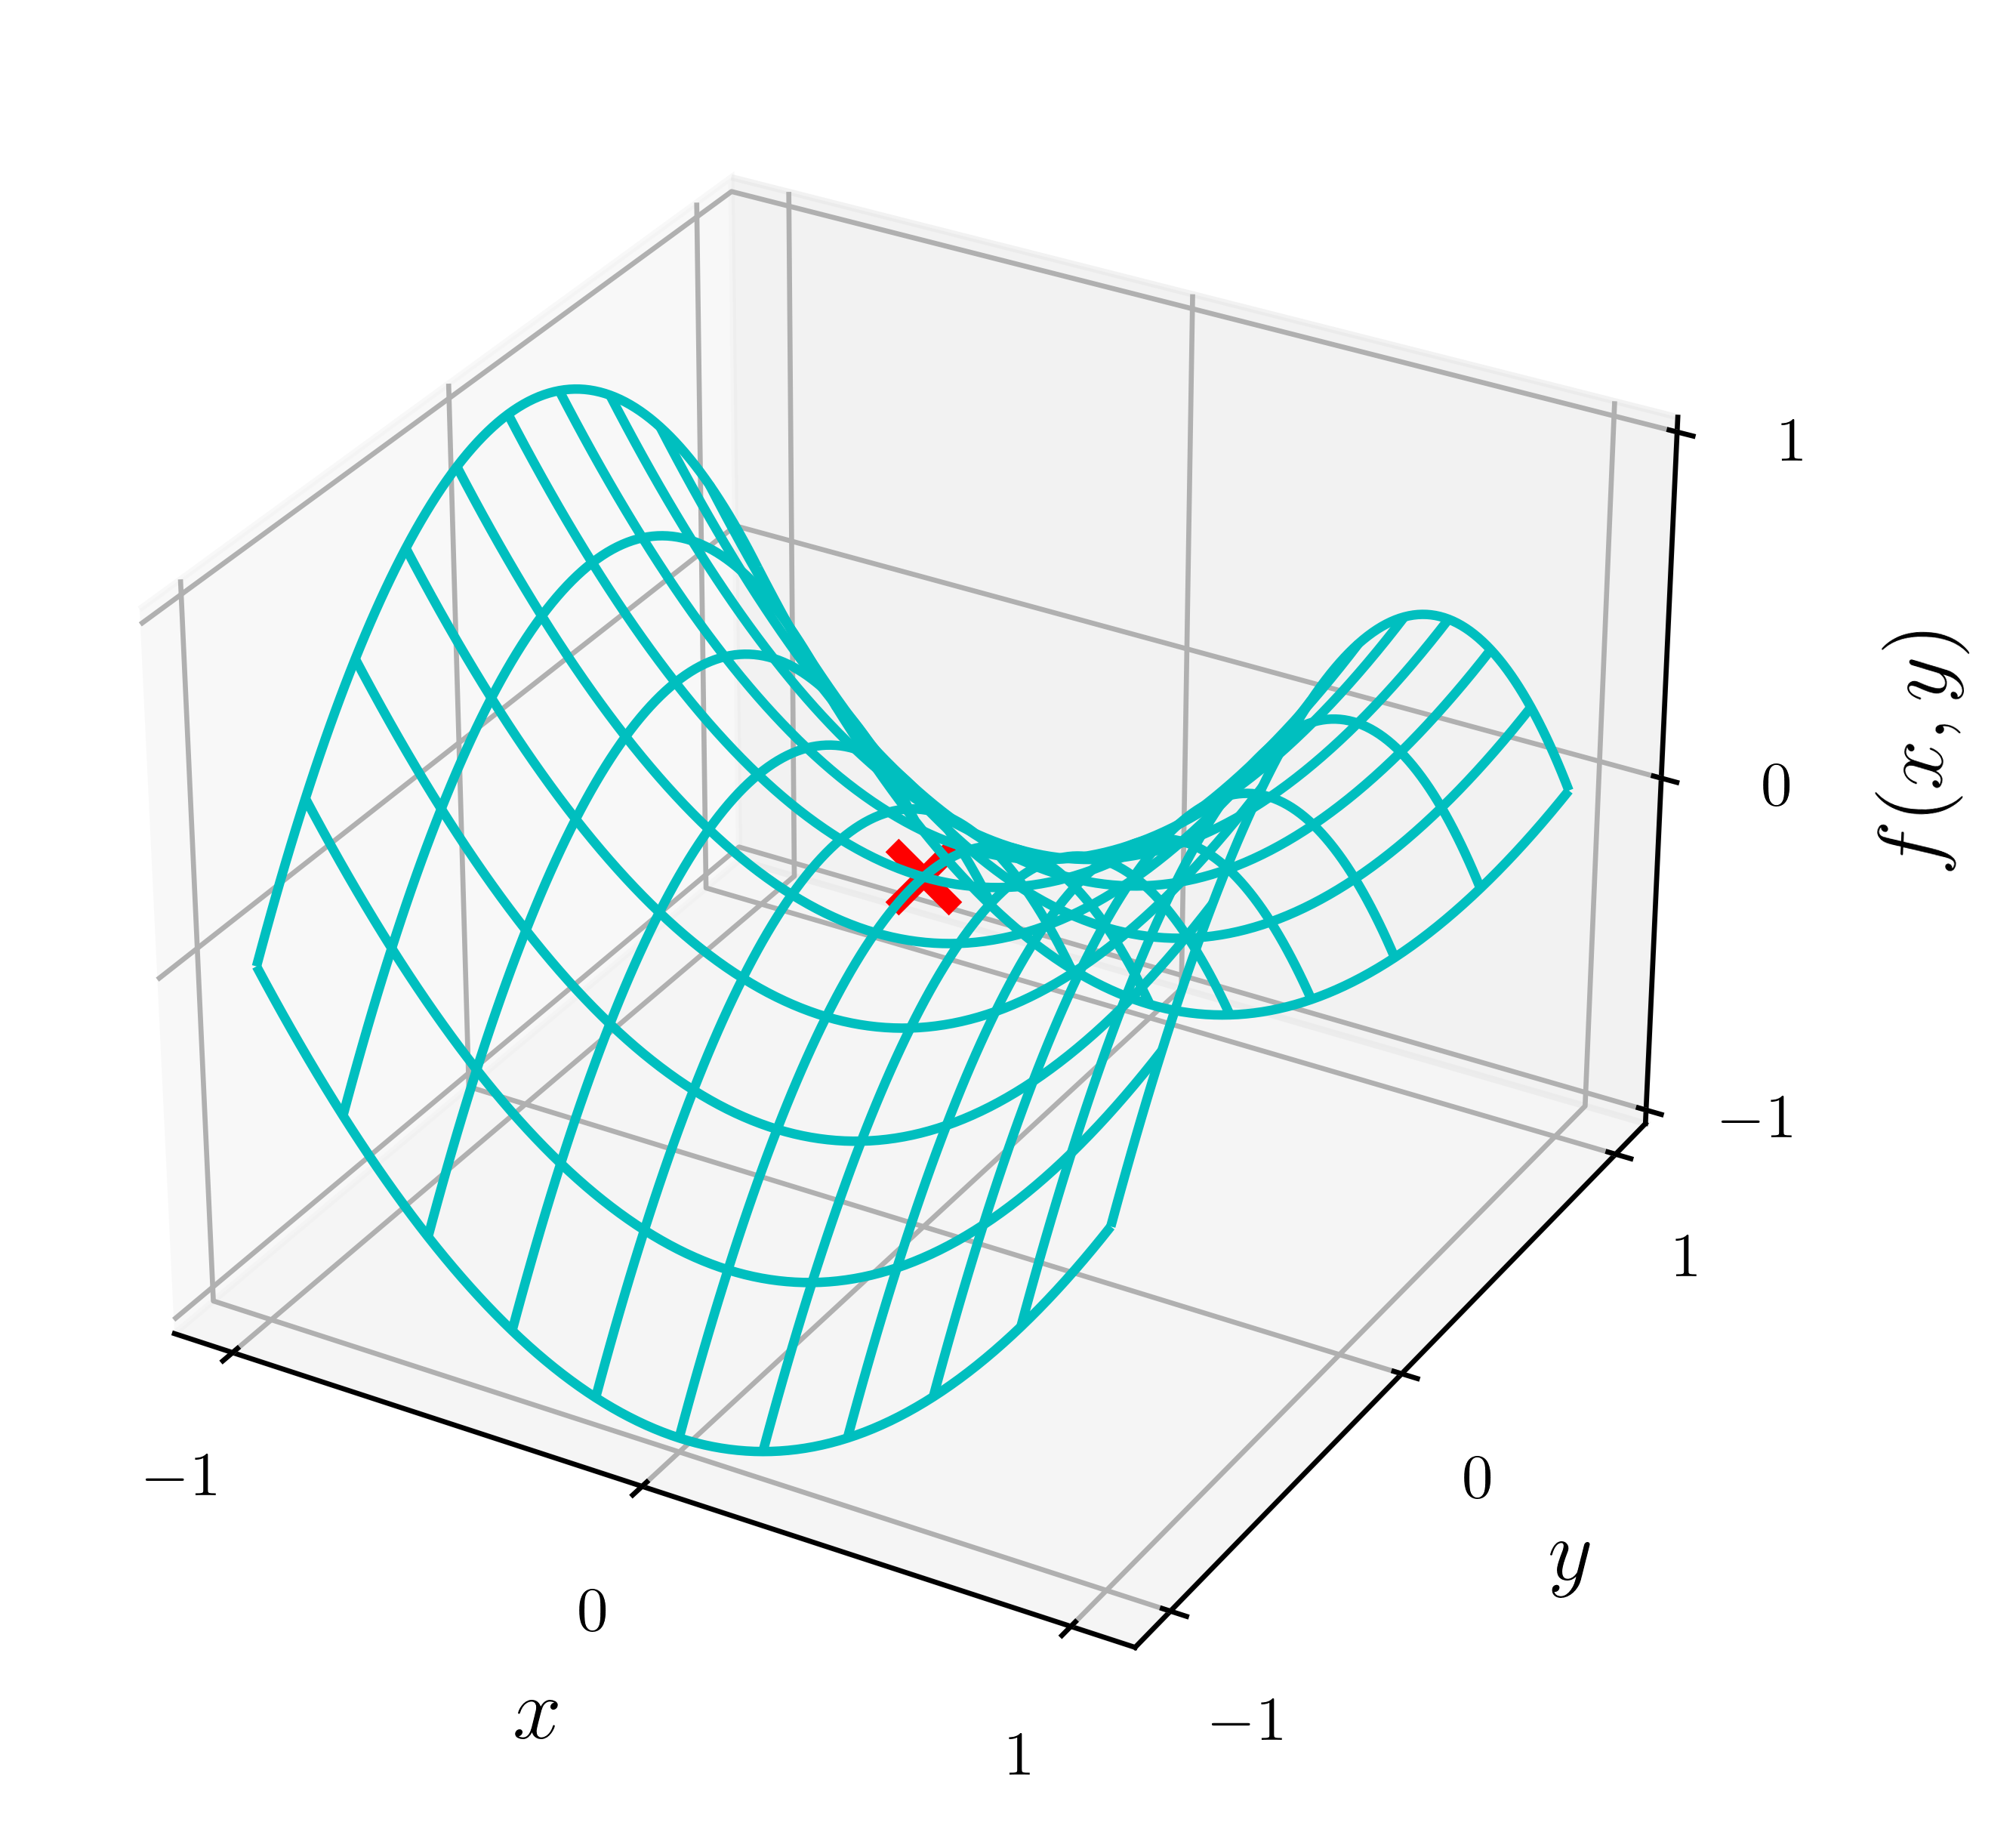

In [8]:
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt


x, y = tf.meshgrid(tf.linspace(-1.0, 1.0, 101), tf.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = plt.figure(figsize=(5,5), dpi=600).add_subplot(111, projection='3d')

ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10}, color='c')
ax.plot([0], [0], [0], 'rx',  markersize=10, markeredgewidth=3)
ax.tick_params(axis='both', which='major', labelsize=10)

ticks = [-1, 0, 1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
ax.set_xlabel("\n$x$", size=14,  linespacing=0)
ax.set_ylabel("\n$y$", size=14,  linespacing=0);
ax.set_zlabel("\n$f(x, y)$", size=14,  linespacing=0);


In [9]:
import numpy as np

def f(x):  # Цільова функція
    return x**2

def f_grad(x):  # Градієнт (похідна) цільової функції
    return 2 * x

def bgd(alpha, f_grad):
    x = 6.0        # Початкове значення х
    results = [x]
    epoch = 8      # Максимальне число ітерацій 
    for i in range(epoch):
        x -= alpha * f_grad(x)
        results.append(float("%.6f" % x))
    print(f'ітерація {epoch}, x: {x:.6f}')
    return results

results = bgd(0.25, f_grad)
print(results)

ітерація 8, x: 0.023438
[6.0, 3.0, 1.5, 0.75, 0.375, 0.1875, 0.09375, 0.046875, 0.023438]


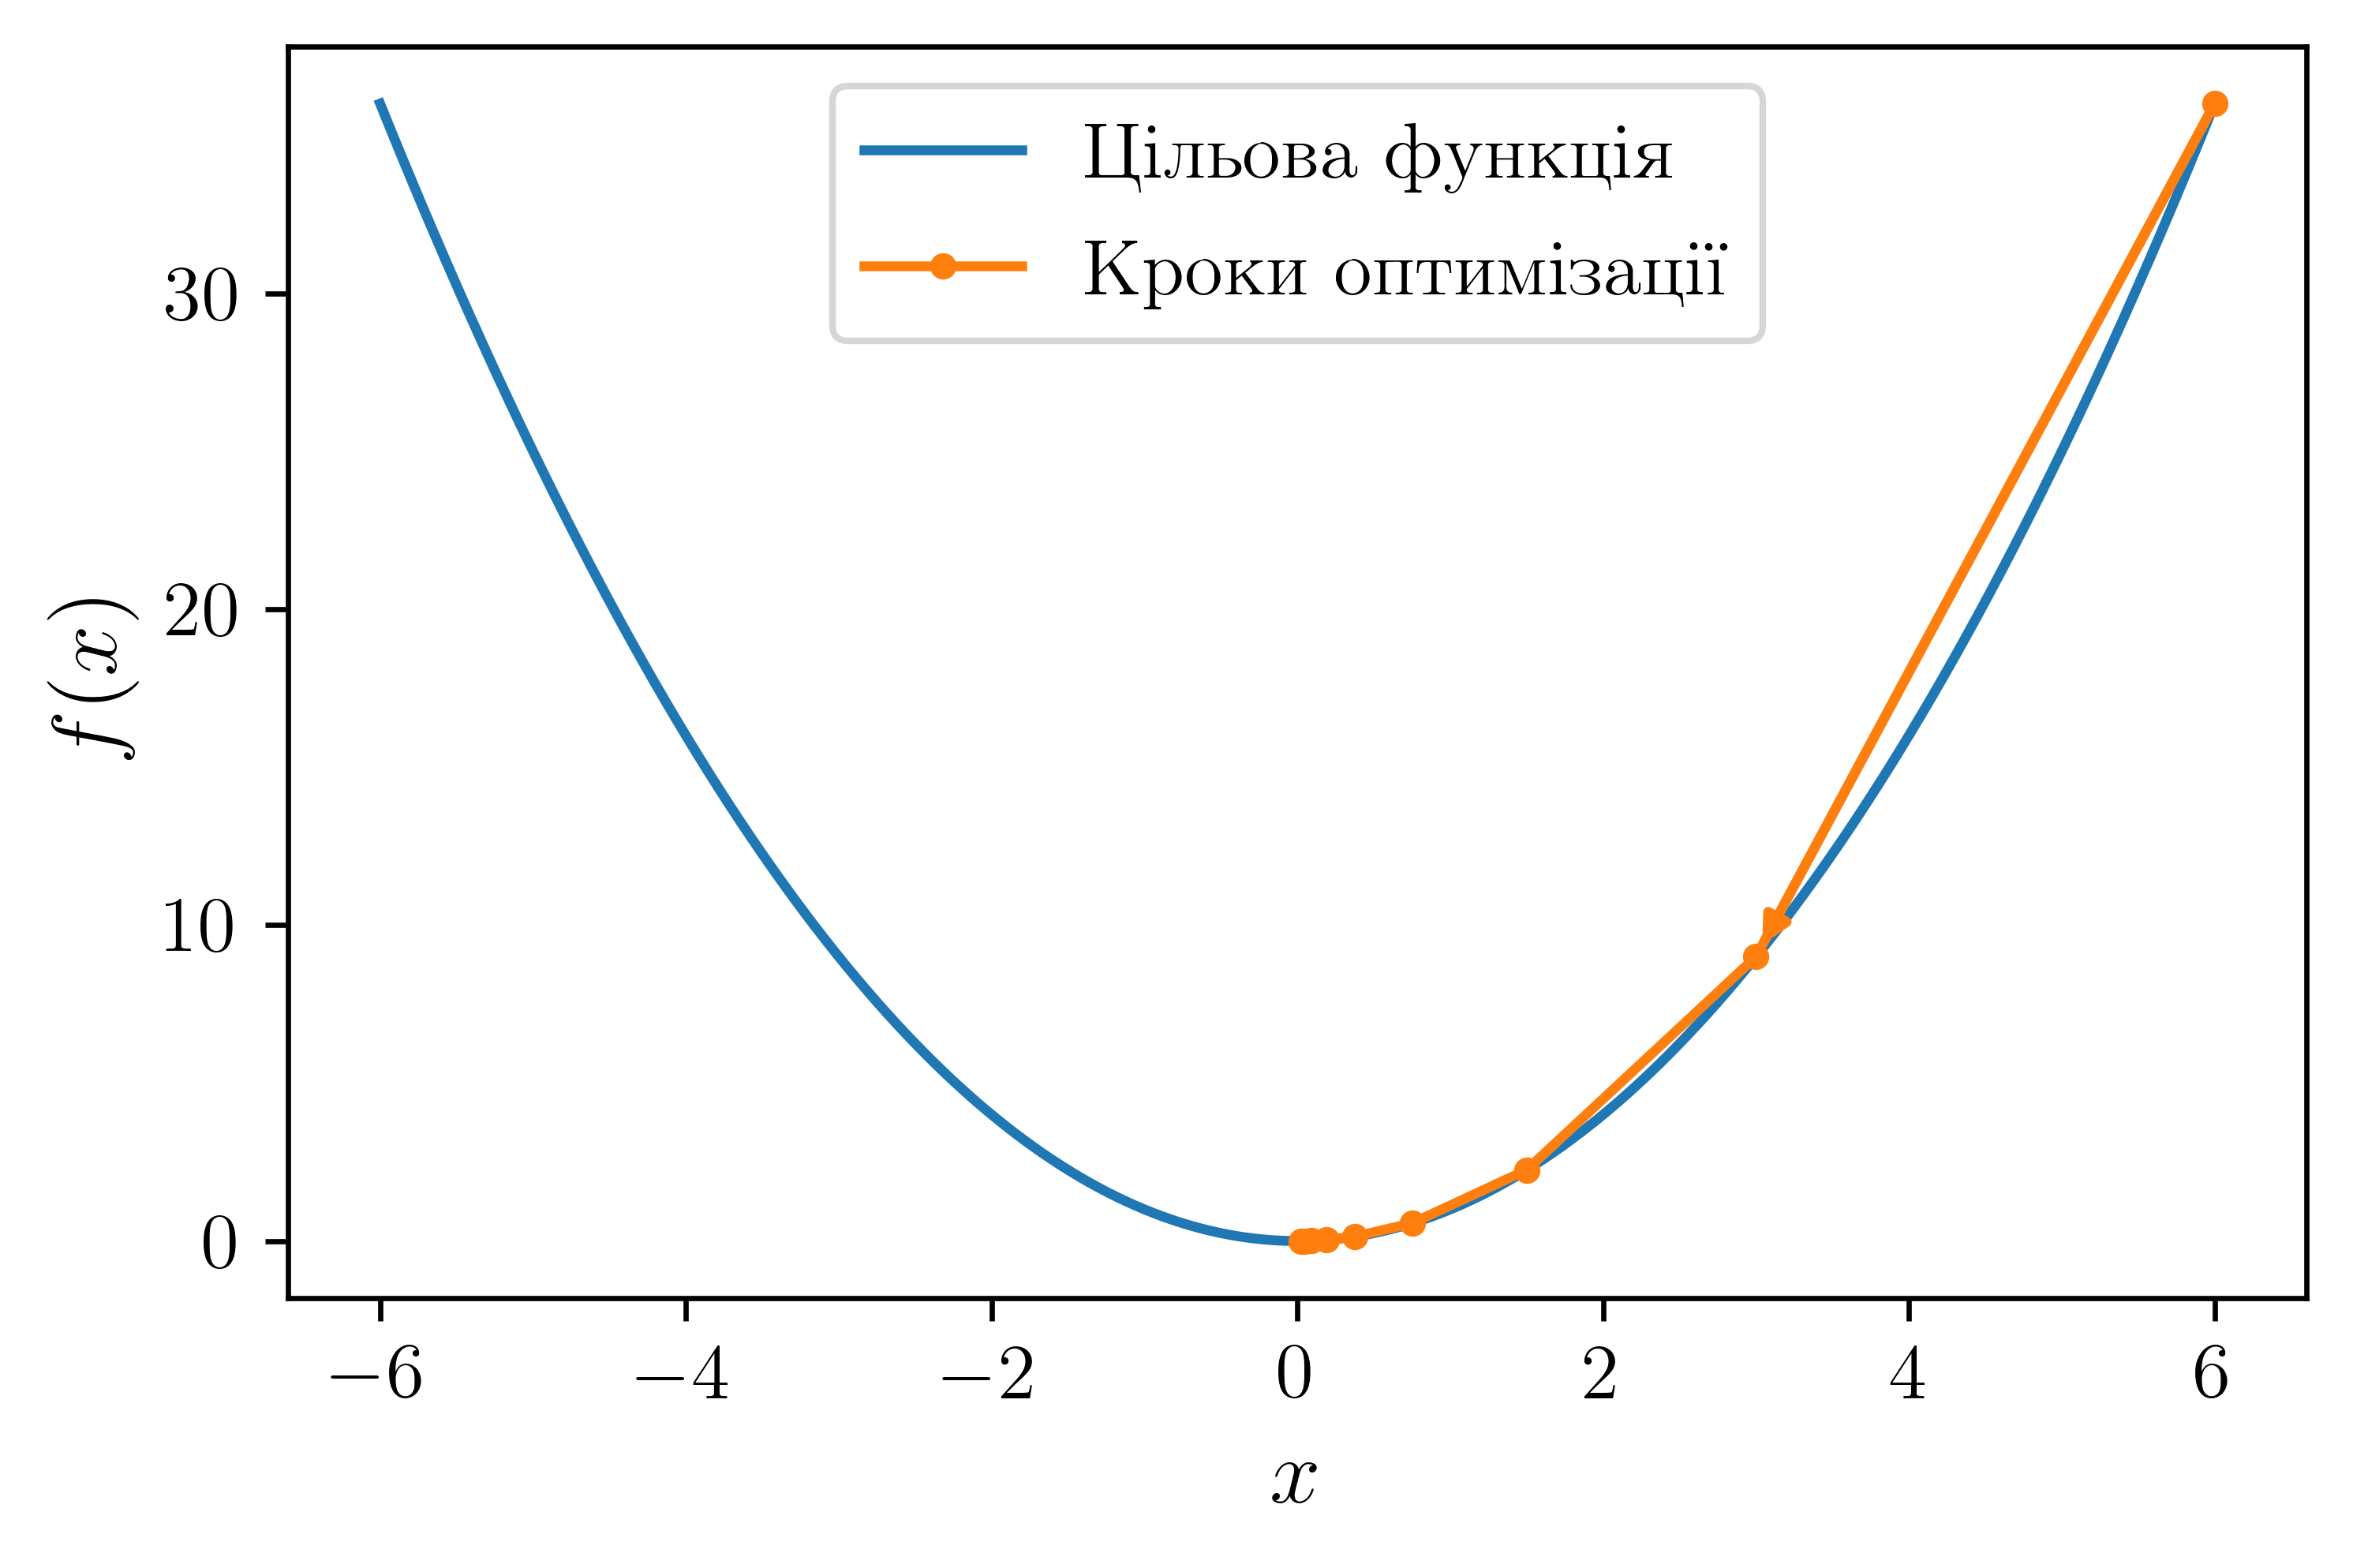

In [10]:
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import rc
def annotate(text, xy, xytext):  
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(facecolor='C1', ec="C1", lw=1.5, arrowstyle='-|>'),
                            fontsize=8,)

def show_trace(results, f):
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)
    #rc('text.latex', unicode=True)
    rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
    rc('text.latex', preamble=r'\usepackage[ukrainian]{babel}')
    plt.rcParams['font.size'] = 12
    plt.figure(dpi=600)
    n = max(abs(min(results)), abs(max(results)))
    f_line = tf.range(-n, n, 0.01)
    fmts = ['-', '-o']
    X = [f_line, results]
    leg = ["Цільова функція", "Кроки оптимізації"]
    Y = [[f(x) for x in f_line], [f(x) for x in results]]
#     linewidth = [2, 1]
#     for x, y, fmt, le, lw in zip(X, Y, fmts, leg, linewidth):
    for x, y, fmt, le in zip(X, Y, fmts, leg):
        plt.plot(x, y, fmt, label=f"{str(le)}", markersize=3)
    plt.legend(loc=1, bbox_to_anchor=(0.75,1));
    plt.xlabel(r"$x$", size=14)
    plt.ylabel(r"$f(x)$", size=14)
    annotate(r"",(3, 3*3), (6, 36))

show_trace(results, f)

In [11]:
results = bgd(0.06, f_grad)

ітерація 8, x: 2.157807


[6.0, 5.28, 4.6464, 4.088832, 3.598172, 3.166392, 2.786425, 2.452054, 2.157807]


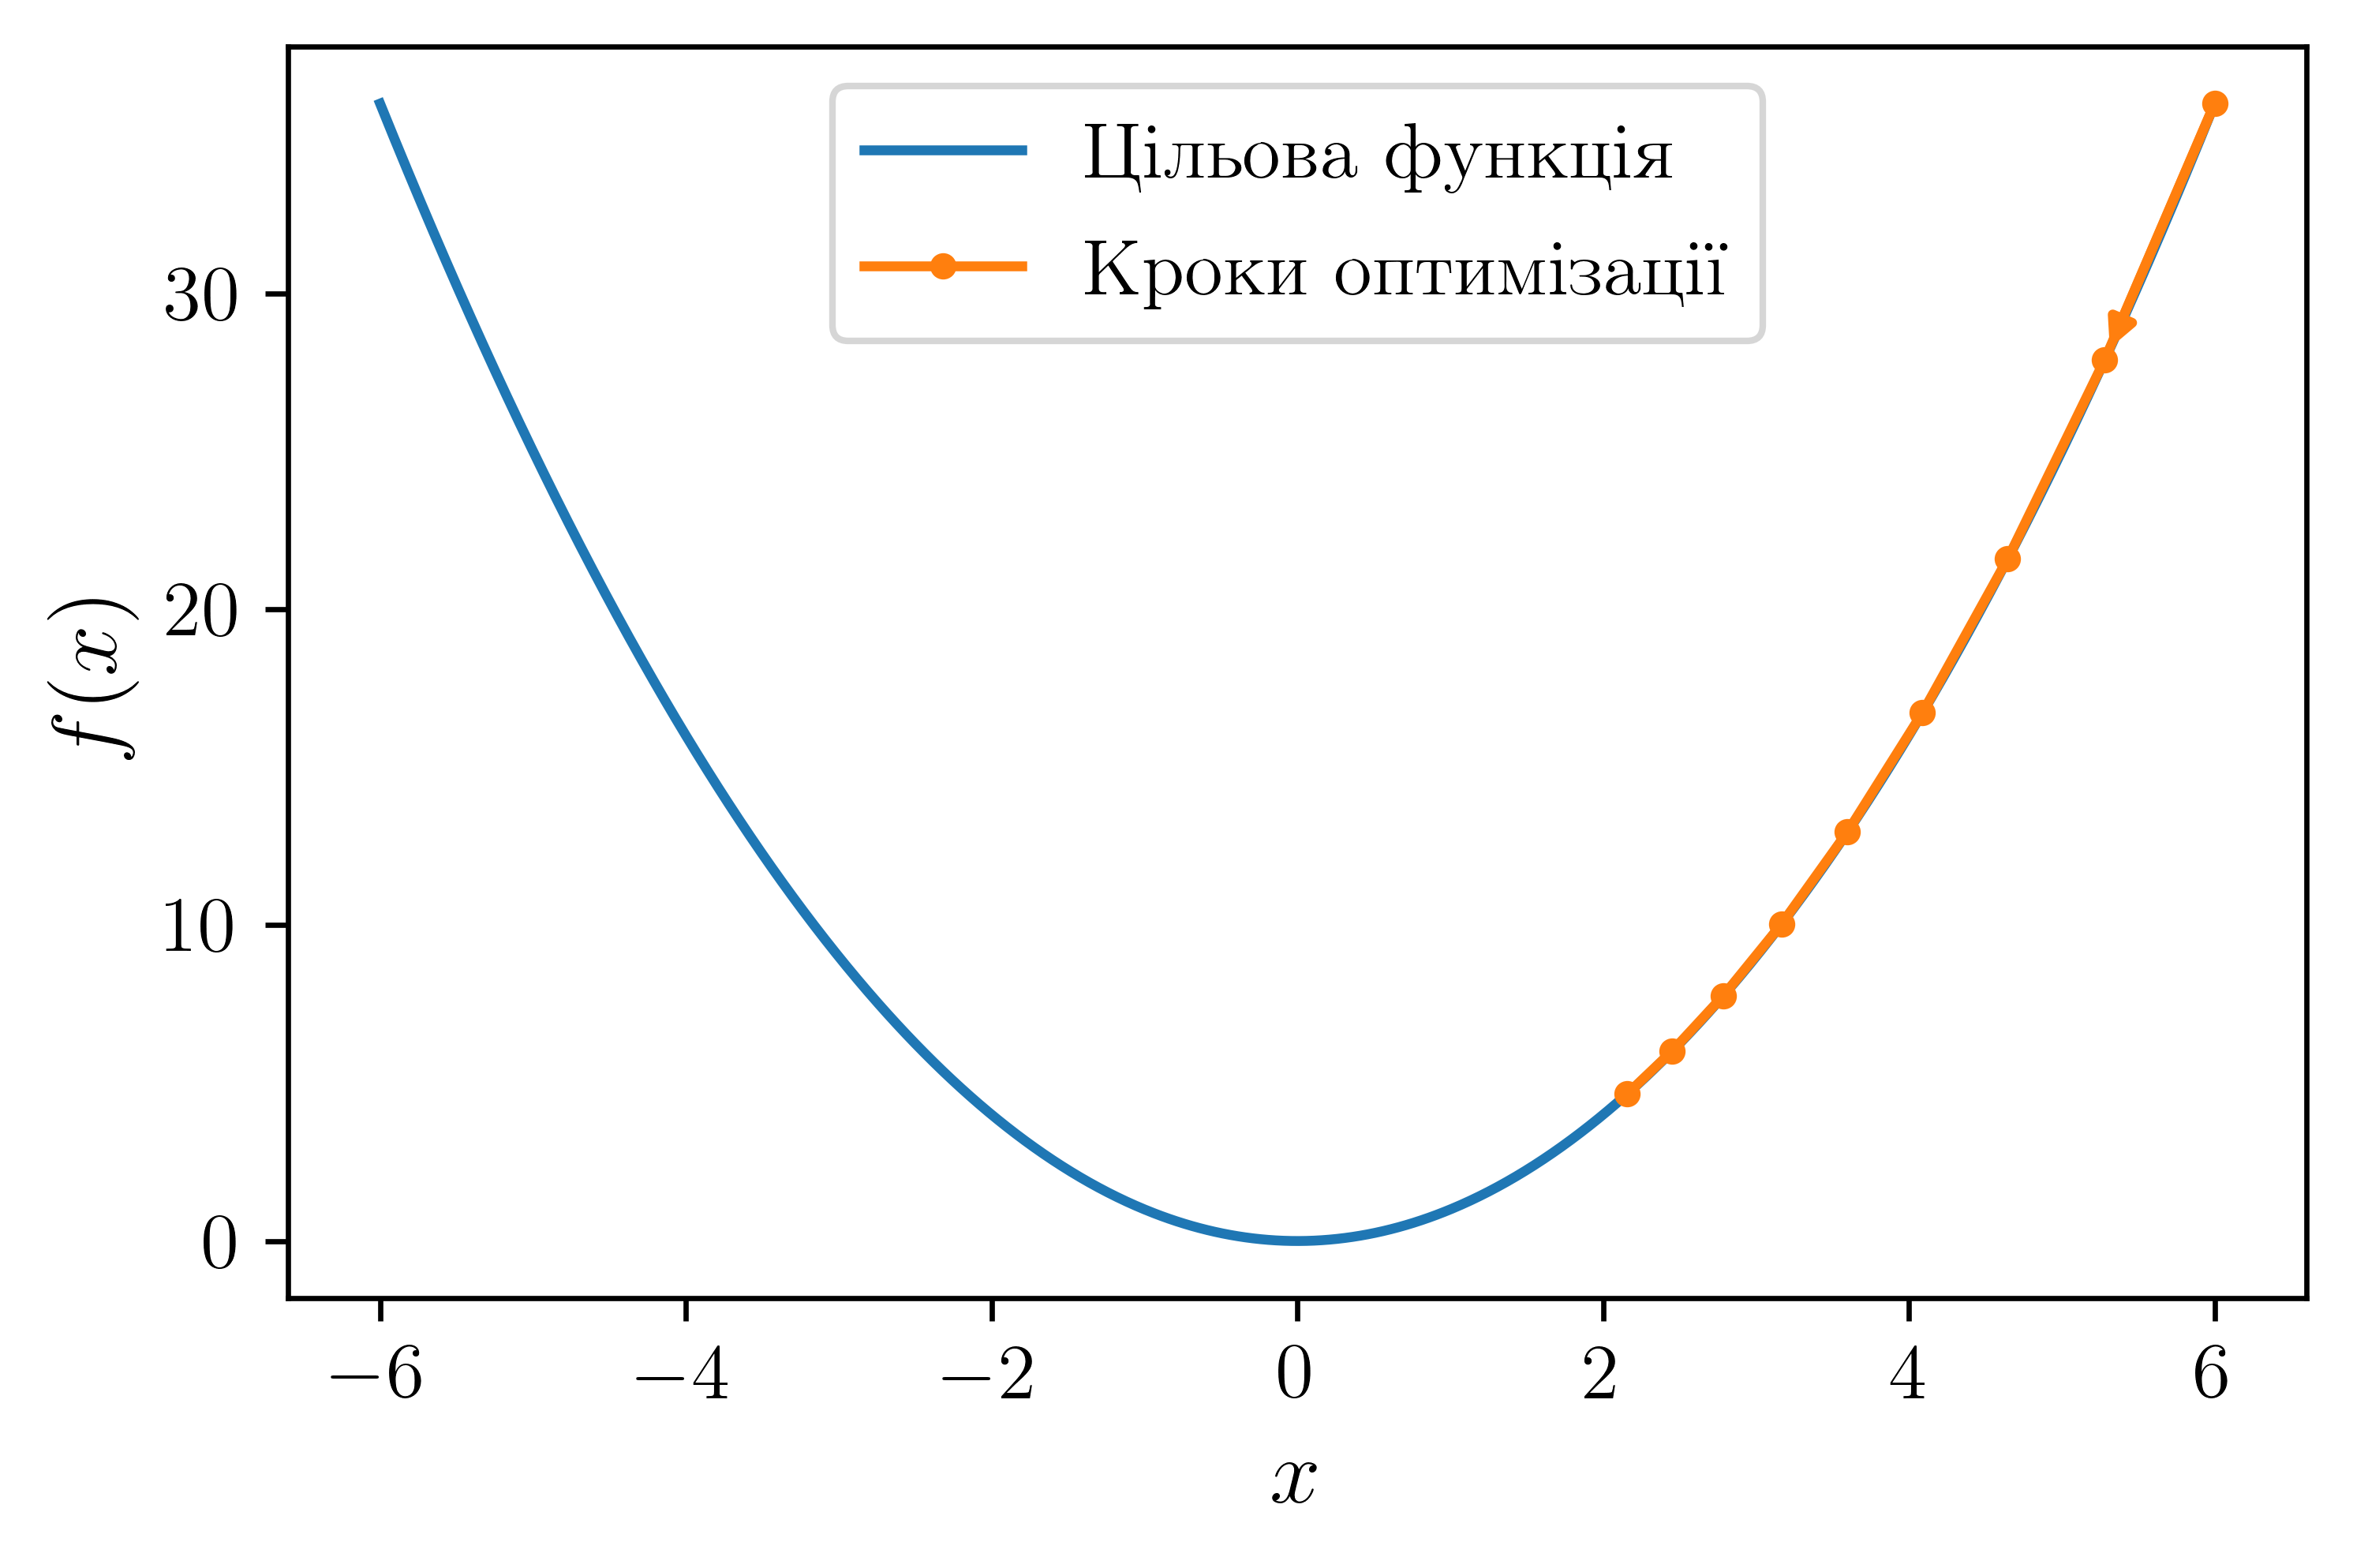

In [12]:
#show_trace(bgd(0.06, f_grad), f)
print(results)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
#rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[ukrainian]{babel}')
plt.rcParams['font.size'] = 12
plt.figure(dpi=600)
n = max(abs(min(results)), abs(max(results)))
f_line = tf.range(-n, n, 0.01)
fmts = ['-', '-o']
X = [f_line, results]
leg = ["Цільова функція", "Кроки оптимізації"]
Y = [[f(x) for x in f_line], [f(x) for x in results]]
#    linewidth = [2, 1]
#    for x, y, fmt, le, lw in zip(X, Y, fmts, leg, linewidth):
for x, y, fmt, le in zip(X, Y, fmts, leg):
        plt.plot(x, y, fmt, label=f"{str(le)}", markersize=3)
plt.legend(loc=1, bbox_to_anchor=(0.75,1));
plt.xlabel(r"$x$", size=14)
plt.ylabel(r"$f(x)$", size=14)
annotate(r"",(5.28, 5.28*5.28), (6, 36))

In [13]:
results = bgd(1.1, f_grad)

ітерація 8, x: 25.798902


[6.0, -7.2, 8.64, -10.368, 12.4416, -14.92992, 17.915904, -21.499085, 25.798902]


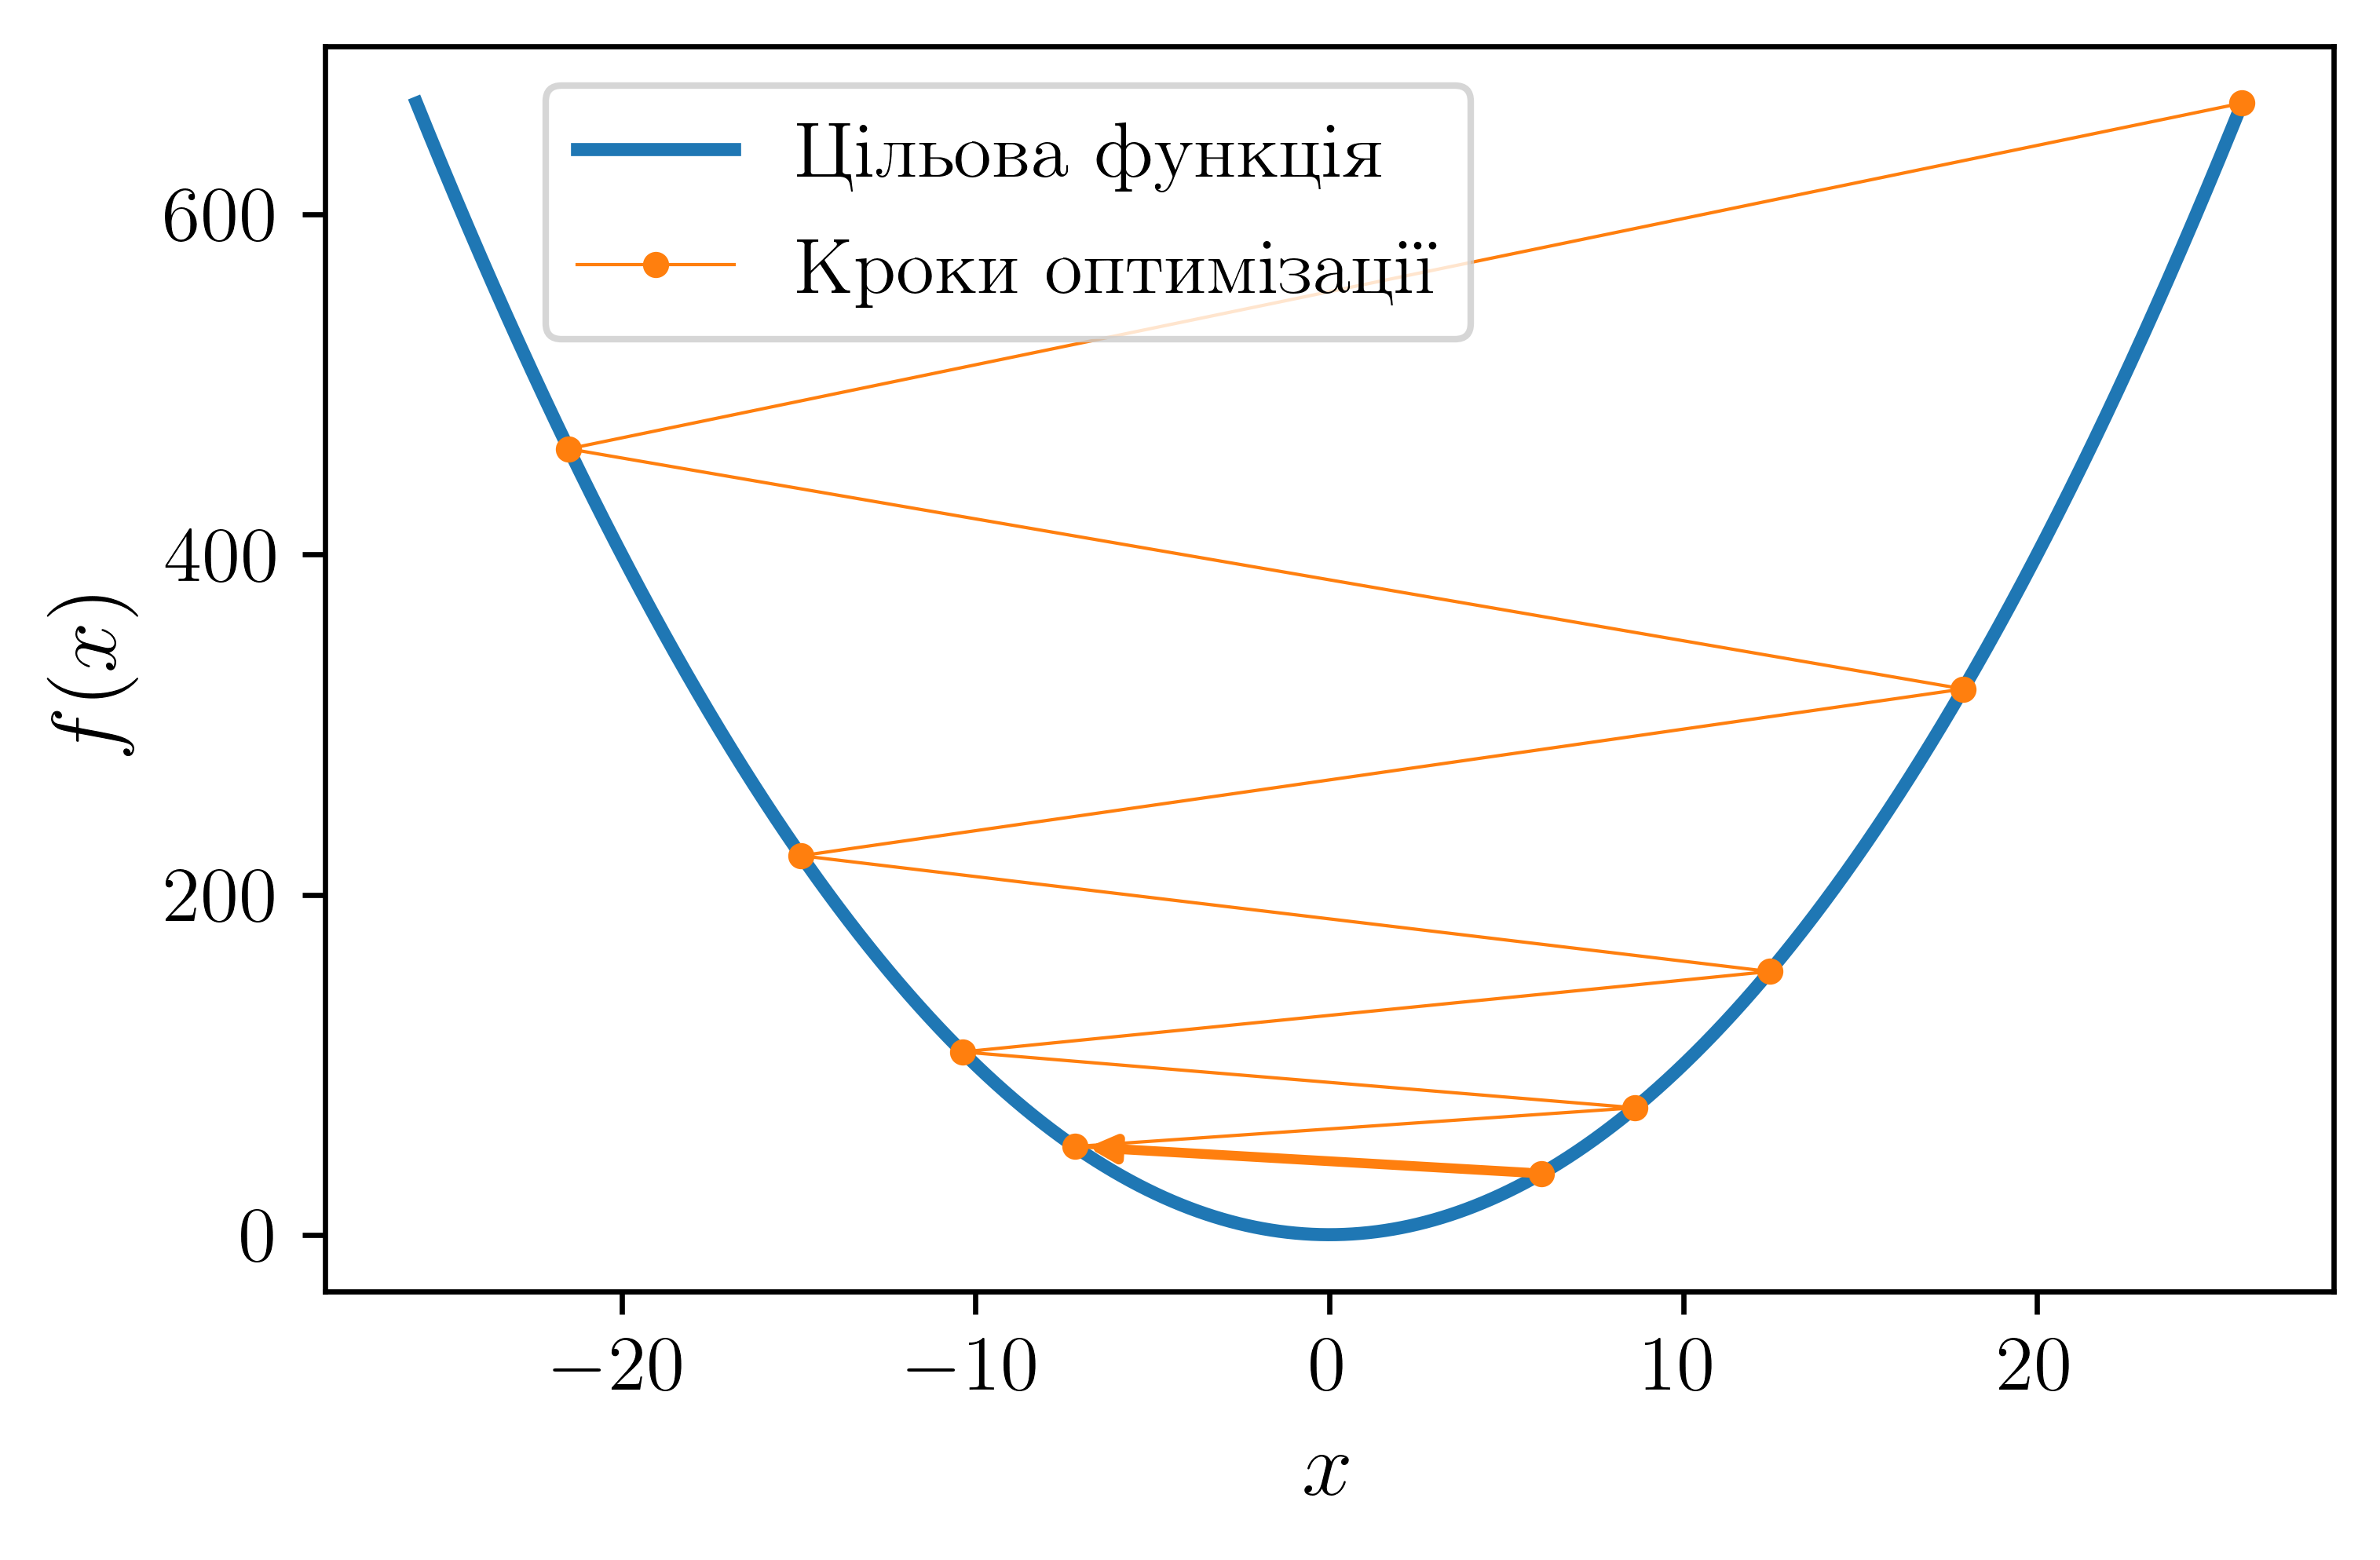

In [14]:
print(results)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
#rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[ukrainian]{babel}')
plt.rcParams['font.size'] = 12
plt.figure(dpi=600)
n = max(abs(min(results)), abs(max(results)))
f_line = tf.range(-n, n, 0.01)
fmts = ['-', '-o']
X = [f_line, results]
leg = ["Цільова функція", "Кроки оптимізації"]
Y = [[f(x) for x in f_line], [f(x) for x in results]]
linewidth = [2, 0.5]
#    for x, y, fmt, le, lw in zip(X, Y, fmts, leg, linewidth):
for x, y, fmt, le, lw in zip(X, Y, fmts, leg, linewidth):
        plt.plot(x, y, fmt, label=f"{str(le)}", markersize=3, linewidth=lw)
plt.legend(loc=1, bbox_to_anchor=(0.59,1.0));
plt.xlabel(r"$x$", size=14)
plt.ylabel(r"$f(x)$", size=14)
annotate(r"",(-7.2, 7.2*7.2), (6, 36))